In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [2]:
data = pd.read_csv("framingham_heart_study.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape

(4240, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
pd.isnull(data).values.sum()

645

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [31]:
data.mode(numeric_only=True)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,120.0,80.0,22.19,75.0,75.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.54,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.91,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.48,NaN,NaN,NaN


In [159]:
new_data = data.fillna(method="ffill")
# new_data = data.interpolate()

In [160]:
new_data.isnull().values.any()

False

In [161]:
x = new_data.drop(["TenYearCHD"], axis=1)
y = new_data["TenYearCHD"]

In [220]:
# creating the training and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, stratify=y, test_size=0.2)

In [225]:
# building dt classifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [226]:
# Train Decision Tree Classifer
classifier = classifier.fit(x_train,y_train)

In [227]:
# predicting the outcome for testing data
y_prediction = classifier.predict(x_test)

In [232]:
# measuring accuracy
model_accuracy = metrics.accuracy_score(y_test, y_prediction)
print("Accuracy:", model_accuracy)

Accuracy: 0.8525943396226415


Text(0, 0.5, 'Frequency')

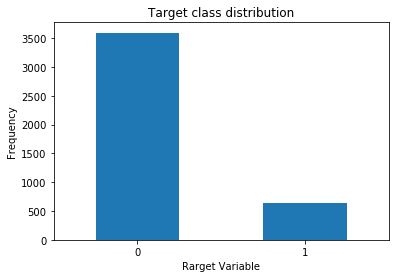

In [167]:
# target class distribution
count_classes = pd.value_counts(new_data["TenYearCHD"], sort=True)
count_classes.plot(kind="bar",rot=0)
plt.title("Target class distribution")
plt.xlabel("Rarget Variable")
plt.ylabel("Frequency")

In [168]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [169]:
print("After oversampling, shape of train x: ", x_train_res.shape)
print("After oversampling, shape of train y: ", y_train_res.shape)

After oversampling, shape of train x:  (5034, 15)
After oversampling, shape of train y:  (5034,)


In [233]:
# training the model with oversampled training data
classifier2 = DecisionTreeClassifier()
classifier2.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [234]:
# predicting the outcome for testing data
target_prediction_after_oversampling = classifier.predict(x_test)

In [235]:
# measuring accuracy
model_accuracy = metrics.accuracy_score(y_test, target_prediction_after_oversampling)
model_accuracy

0.8525943396226415